In [106]:
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("./data/ny_county_data_v2.csv")

In [3]:
#creating df for plotting - mean of per capita variables by test date (over all counties)
plt_df = df.reset_index().groupby('Test Date')[['Per Capita Rate - New Cases','Per Capita Rate - New Tests']].mean().reset_index()

In [4]:
#creating quartile df for plotting - mean of per capita variables by test date and quartiles (over all counties)
qt_plt_df = df.reset_index().groupby(['Test Date','sdi_quartile_label'])[['Per Capita Rate - New Cases','Per Capita Rate - New Tests']].mean().reset_index()

In [5]:
plt_df.head()

,Test Date,Per Capita Rate - New Cases,Per Capita Rate - New Tests
0,2020-03-02,0.001667,0.001667
1,2020-03-03,0.000000,0.008428
2,2020-03-04,0.001615,0.053442
3,2020-03-05,0.034556,0.157067
4,2020-03-06,0.014066,0.078272


In [88]:
#converting test date variable to date format
plt_df['Test Date'] = pd.to_datetime(plt_df['Test Date'])
qt_plt_df['Test Date'] = pd.to_datetime(qt_plt_df['Test Date'])

In [7]:
#peak of curve
plt_df[plt_df['Per Capita Rate - New Cases']==max(plt_df['Per Capita Rate - New Cases'])]

,Test Date,Per Capita Rate - New Cases,Per Capita Rate - New Tests
38,2020-04-09,17.958666,65.903456


In [8]:
SIP_order_date = pd.to_datetime('2020-03-22')
SIP_plus_four = pd.to_datetime('2020-03-26')
peak_curve = pd.to_datetime('2020-04-09')

In [203]:
#text box format
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="r", lw=2)
bbox_props2 = dict(boxstyle="square,pad=0.3", fc="white", ec="blue", lw=2)

#outcome values for new cases at marker dates
o1= round(float(plt_df[plt_df['Test Date']==SIP_order_date]['Per Capita Rate - New Cases']),2)
o2 = round(float(plt_df[plt_df['Test Date']==SIP_plus_four]['Per Capita Rate - New Cases']),2)
o3 = round(float(plt_df[plt_df['Test Date']==peak_curve]['Per Capita Rate - New Cases']),2)

#outcome values for new tests at marker dates
t1= round(float(plt_df[plt_df['Test Date']==SIP_order_date]['Per Capita Rate - New Tests']),2)
t2 = round(float(plt_df[plt_df['Test Date']==SIP_plus_four]['Per Capita Rate - New Tests']),2)
t3 = round(float(plt_df[plt_df['Test Date']==peak_curve]['Per Capita Rate - New Tests']),2)

#creating markers
A =  SIP_plus_four, peak_curve
B = o2,o3
B_t = t2, t3

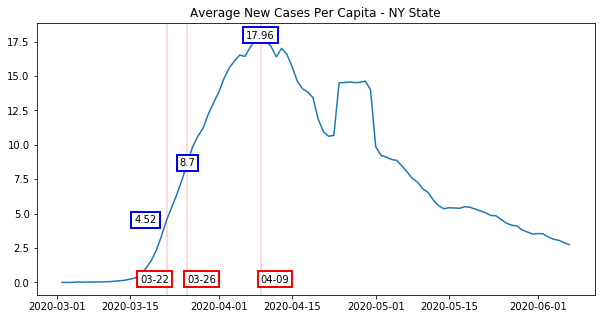

In [204]:
fig = plt.figure()
plt.plot(plt_df['Test Date'], plt_df['Per Capita Rate - New Cases'])

rcParams['figure.figsize'] = 10,5
plt.title("Average New Cases Per Capita - NY State")

for x,y in zip(A, B):
    plt.axvline(x=x,alpha=0.2,color='r')
    t = plt.text(x,y, str(y), ha="center", va="center", size=10, bbox=bbox_props2)
    plt.annotate(x.strftime('%m-%d'),(x,0),bbox=bbox_props)

#plotting sip date spaced back by 5 days to avoid overlap
plt.axvline(x=SIP_order_date,alpha=0.2,color='r')
plt.annotate(SIP_order_date.strftime('%m-%d'),(SIP_order_date-pd.Timedelta('5 days'),0),bbox=bbox_props)
t = plt.text(SIP_order_date-pd.Timedelta('4 days'),o1, str(o1), ha="center", va="center", size=10, bbox=bbox_props2)
    

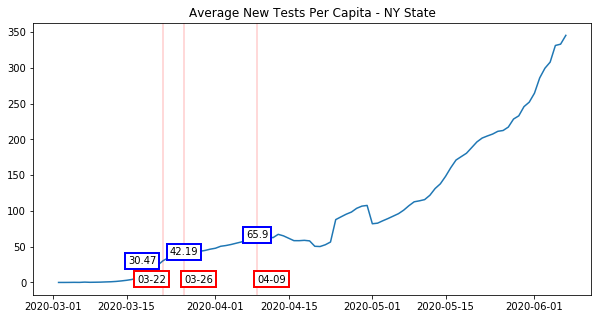

In [206]:
fig = plt.figure()
plt.plot(plt_df['Test Date'], plt_df['Per Capita Rate - New Tests'])

rcParams['figure.figsize'] = 10,5
plt.title("Average New Tests Per Capita - NY State")

for x,y in zip(A, B_t):
    plt.axvline(x=x,alpha=0.2,color='r')
    t = plt.text(x,y, str(y), ha="center", va="center", size=10, bbox=bbox_props2)
    plt.annotate(x.strftime('%m-%d'),(x,0),bbox=bbox_props)

plt.axvline(x=SIP_order_date,alpha=0.2,color='r')
plt.annotate(SIP_order_date.strftime('%m-%d'),(SIP_order_date-pd.Timedelta('5 days'),0),bbox=bbox_props)
t = plt.text(SIP_order_date-pd.Timedelta('4 days'),t1, str(t1), ha="center", va="center", size=10, bbox=bbox_props2)

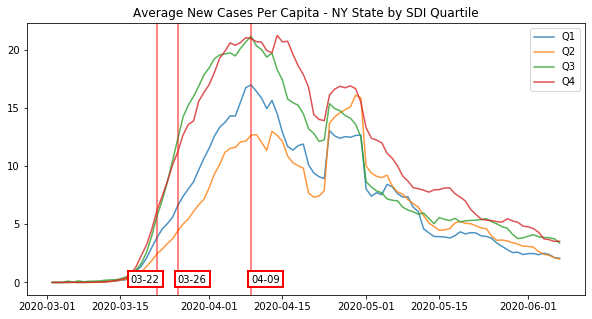

In [207]:
plt.figure()
for q in qt_plt_df['sdi_quartile_label'].unique():
    curr_plt_df = qt_plt_df[qt_plt_df['sdi_quartile_label']==q]
    
    plt.plot(curr_plt_df['Test Date'], curr_plt_df['Per Capita Rate - New Cases'], label=str(q),alpha=0.8)
    for x in A:
        plt.axvline(x=x,alpha=0.2,color='r')
        plt.annotate(x.strftime('%m-%d'),(x,0),bbox=bbox_props)
    
    plt.axvline(x=SIP_order_date,alpha=0.2,color='r')
    plt.annotate(SIP_order_date.strftime('%m-%d'),(SIP_order_date-pd.Timedelta('5 days'),0),bbox=bbox_props)
    
    rcParams['figure.figsize'] = 10,5
    plt.title("Average New Cases Per Capita - NY State by SDI Quartile")

plt.legend()
plt.show()

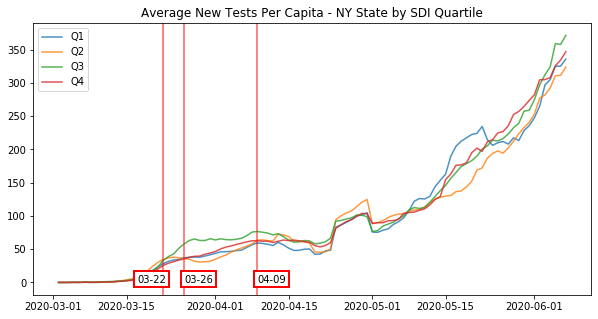

In [208]:
#plotting
plt.figure()
for q in qt_plt_df['sdi_quartile_label'].unique():
    curr_plt_df = qt_plt_df[qt_plt_df['sdi_quartile_label']==q]
    
    plt.plot(curr_plt_df['Test Date'], curr_plt_df['Per Capita Rate - New Tests'], label=str(q),alpha=0.8)
    for x in A:
        plt.axvline(x=x,alpha=0.2,color='r')
        plt.annotate(x.strftime('%m-%d'),(x,0),bbox=bbox_props)
        
    plt.axvline(x=SIP_order_date,alpha=0.2,color='r')
    plt.annotate(SIP_order_date.strftime('%m-%d'),(SIP_order_date-pd.Timedelta('5 days'),0),bbox=bbox_props)
    
        
    rcParams['figure.figsize'] = 10,5
    plt.title("Average New Tests Per Capita - NY State by SDI Quartile")

plt.legend()
plt.show()